# Algoritmos de optimización - Seminario<br>
Nombre y Apellidos:   <br>
Url: https://github.com/.../03MAIR---Algoritmos-de-Optimizacion---2019/tree/master/SEMINARIO<br>
Problema:
> 1. Sesiones de doblaje <br>
>2. Organizar los horarios de partidos de La Liga<br>
>3. Combinar cifras y operaciones

Descripción del problema:(copiar enunciado)

....

(*) La respuesta es obligatoria





                                        

# 2. Organizar los horarios de partidos de La Liga(III)

• Los horarios disponibles se conocen a priori y son los siguientes:

• Desde la La Liga de fútbol profesional se pretende organizar los horarios de los partidos de liga de cada jornada. Se conocen algunos datos que nos deben llevar a diseñar un
algoritmo que realice la asignación de los partidos a los horarios de forma que maximice la audiencia. 

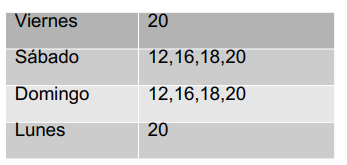


• En primer lugar se clasifican los equipos en tres categorías según el numero de
seguidores( que tiene relación directa con la audiencia). Hay 3 equipos en la
categoría A, 11 equipos de categoría B y 6 equipos de categoría C.

• Se conoce estadísticamente la audiencia que genera cada partido según los equipos
que se enfrentan y en horario de sábado a las 20h (el mejor en todos los casos)

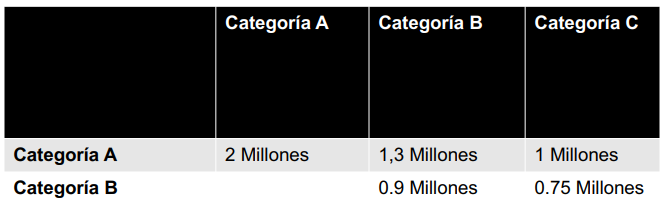

• Si el horario del partido no se realiza a las 20 horas del sábado se sabe que se reduce
  según los coeficientes de la siguiente tabla


•  Si el horario del partido no se realiza a las 20 horas del sábado se sabe que se reduce según los coeficientes de la siguiente tabla

• Debemos asignar obligatoriamente siempre un partido el viernes y un partido el lunes

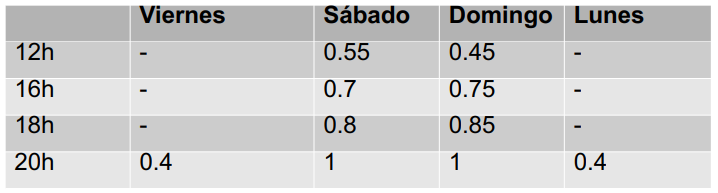

•  Es posible la coincidencia de horarios pero en este caso la audiencia de cada partido se verá afectada y se estima que se reduce en porcentaje según la siguiente tabla    dependiendo   del número de coincidencias:

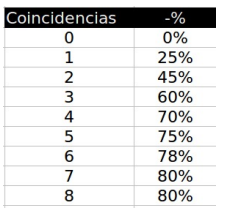

Los cálculos asociados a una jornada de ejemplo se realizan según se muestra en la
siguiente tabla:

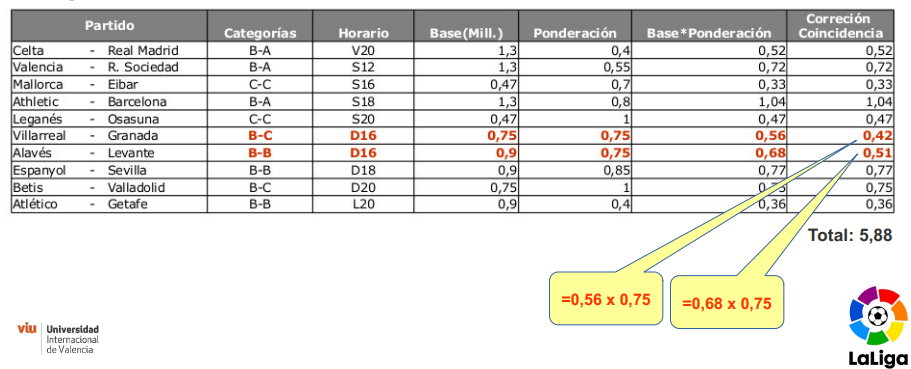

In [11]:
import pandas as pd

audiencia_base = {
    ('A', 'A'): 2.0,
    ('A', 'B'): 1.3,
    ('A', 'C'): 1.0,
    ('B', 'B'): 0.9,
    ('B', 'C'): 0.75,
    ('C', 'C'): 0.6
}

ponderaciones = {
    'V20': 0.4, 'S12': 0.55, 'S16': 0.7, 'S18': 0.8, 'S20': 1.0,
    'D12': 0.45, 'D16': 0.75, 'D18': 0.85, 'D20': 1.0, 'L20': 0.4
}

penalizacion_coincidencias = {
    0: 0.0, 1: 0.25, 2: 0.45, 3: 0.60, 4: 0.70, 5: 0.75,
    6: 0.78, 7: 0.80, 8: 0.80
}

partidos = [
    ("Celta", "Real Madrid", "B", "A"),
    ("Valencia", "R. Sociedad", "B", "A"),
    ("Mallorca", "Eibar", "C", "C"),
    ("Athletic", "Barcelona", "B", "A"),
    ("Leganés", "Osasuna", "C", "B"),
    ("Villarreal", "Granada", "B", "C"),
    ("Alavés", "Levante", "B", "C"),
    ("Espanyol", "Sevilla", "B", "B"),
    ("Betis", "Valladolid", "B", "B"),
    ("Atlético", "Getafe", "A", "B")
]

partidos_ordenados = sorted(partidos, key=lambda p: audiencia_base.get(tuple(sorted([p[2], p[3]])), 0), reverse=True)

cuenta_horarios = {h: 0 for h in ponderaciones}
asignaciones = []

for partido in partidos_ordenados:
    equipo1, equipo2, cat1, cat2 = partido
    cat_par = tuple(sorted([cat1, cat2]))
    base = audiencia_base.get(cat_par, 0)

    mejor_horario = None
    mejor_valor = -1
    for horario, pondera in sorted(ponderaciones.items(), key=lambda x: x[1], reverse=True):
        penal = penalizacion_coincidencias.get(cuenta_horarios[horario], 0.8)
        valor = base * pondera * (1 - penal)
        if valor > mejor_valor:
            mejor_valor = valor
            mejor_horario = horario

    cuenta_horarios[mejor_horario] += 1
    asignaciones.append({
        "Partido": f"{equipo1} - {equipo2}",
        "Categorías": f"{cat1}-{cat2}",
        "Horario": mejor_horario,
        "Base (Mill.)": base,
        "Ponderación": ponderaciones[mejor_horario],
        "Penalización": penalizacion_coincidencias.get(cuenta_horarios[mejor_horario] - 1, 0.8),
        "Audiencia Efectiva": round(base * ponderaciones[mejor_horario] * (1 - penalizacion_coincidencias.get(cuenta_horarios[mejor_horario] - 1, 0.8)), 2)
    })

df_asignaciones = pd.DataFrame(asignaciones)
audiencia_total = df_asignaciones["Audiencia Efectiva"].sum().round(2)

# Mostrar resultados
print(df_asignaciones)
print(f"\nAudiencia total estimada: {audiencia_total} millones")


                  Partido Categorías Horario  Base (Mill.)  Ponderación  \
0     Celta - Real Madrid        B-A     S20          1.30         1.00   
1  Valencia - R. Sociedad        B-A     D20          1.30         1.00   
2    Athletic - Barcelona        B-A     D18          1.30         0.85   
3       Atlético - Getafe        A-B     S18          1.30         0.80   
4      Espanyol - Sevilla        B-B     S20          0.90         1.00   
5      Betis - Valladolid        B-B     D20          0.90         1.00   
6       Leganés - Osasuna        C-B     D16          0.75         0.75   
7    Villarreal - Granada        B-C     S16          0.75         0.70   
8        Alavés - Levante        B-C     D18          0.75         0.85   
9        Mallorca - Eibar        C-C     S18          0.60         0.80   

   Penalización  Audiencia Efectiva  
0          0.00                1.30  
1          0.00                1.30  
2          0.00                1.10  
3          0.00       

- Calcula la audiencia base según la categoría de los equipos.

- Aplica la ponderación por el horario del partido.

- Corrige la audiencia por la penalización de coincidencias en el mismo horario.

- Muestra el detalle de cada partido y la audiencia total estimada para la jornada.

1️⃣ Calcular audiencia base según las categorías

In [13]:
import pandas as pd

# Mostrar resultados de audiencia base por categoría
df_base = pd.DataFrame(audiencia_base_resultados)
print(df_base)


                  Partido Categorías  Audiencia Base
0     Celta - Real Madrid        B-A            1.30
1  Valencia - R. Sociedad        B-A            1.30
2    Athletic - Barcelona        B-A            1.30
3       Atlético - Getafe        A-B            1.30
4      Espanyol - Sevilla        B-B            0.90
5      Betis - Valladolid        B-B            0.90
6       Leganés - Osasuna        C-B            0.75
7    Villarreal - Granada        B-C            0.75
8        Alavés - Levante        B-C            0.75
9        Mallorca - Eibar        C-C            0.60


2️⃣ Aplicar la ponderación del horario al partido

In [14]:
# Diccionario de ponderaciones por horario
ponderaciones = {
    'V20': 0.4, 'S12': 0.55, 'S16': 0.7, 'S18': 0.8, 'S20': 1.0,
    'D12': 0.45, 'D16': 0.75, 'D18': 0.85, 'D20': 1.0, 'L20': 0.4
}

# Calcular y mostrar la audiencia base multiplicada por la ponderación horaria
for partido in asignaciones:
    categorias = partido["Categorías"]
    horario = partido["Horario"]

    cat1, cat2 = categorias.split("-")
    cat_par = tuple(sorted([cat1, cat2]))

    base = audiencia_base.get(cat_par, 0)
    ponderacion = ponderaciones.get(horario, 0)

    resultado = round(base * ponderacion, 2)

    print(f"Partido: {partido['Partido']}, Horario: {horario}, Base: {base}, Ponderación: {ponderacion}, Resultado: {resultado}")


Partido: Celta - Real Madrid, Horario: S20, Base: 1.3, Ponderación: 1.0, Resultado: 1.3
Partido: Valencia - R. Sociedad, Horario: D20, Base: 1.3, Ponderación: 1.0, Resultado: 1.3
Partido: Athletic - Barcelona, Horario: D18, Base: 1.3, Ponderación: 0.85, Resultado: 1.1
Partido: Atlético - Getafe, Horario: S18, Base: 1.3, Ponderación: 0.8, Resultado: 1.04
Partido: Espanyol - Sevilla, Horario: S20, Base: 0.9, Ponderación: 1.0, Resultado: 0.9
Partido: Betis - Valladolid, Horario: D20, Base: 0.9, Ponderación: 1.0, Resultado: 0.9
Partido: Leganés - Osasuna, Horario: D16, Base: 0.75, Ponderación: 0.75, Resultado: 0.56
Partido: Villarreal - Granada, Horario: S16, Base: 0.75, Ponderación: 0.7, Resultado: 0.52
Partido: Alavés - Levante, Horario: D18, Base: 0.75, Ponderación: 0.85, Resultado: 0.64
Partido: Mallorca - Eibar, Horario: S18, Base: 0.6, Ponderación: 0.8, Resultado: 0.48


3️⃣ Aplicar la penalización por coincidencias

In [15]:
# Diccionario de penalización por coincidencias en el mismo horario
penalizacion_coincidencias = {
    0: 0.0, 1: 0.25, 2: 0.45, 3: 0.60, 4: 0.70,
    5: 0.75, 6: 0.78, 7: 0.80, 8: 0.80
}

# Contador de coincidencias por horario
coincidencias_horarios = {h: 0 for h in ponderaciones}

# Calcular penalización por coincidencias
for partido in asignaciones:
    horario = partido["Horario"]
    coincidencias = coincidencias_horarios[horario]
    penalizacion = penalizacion_coincidencias.get(coincidencias, 0.8)
    correccion = round(1 - penalizacion, 2)

    print(f"Partido: {partido['Partido']}, Horario: {horario}, Coincidencias: {coincidencias}, Penalización: {penalizacion}, Corrección: {correccion}")

    # Actualizar contador de partidos en ese horario
    coincidencias_horarios[horario] += 1


Partido: Celta - Real Madrid, Horario: S20, Coincidencias: 0, Penalización: 0.0, Corrección: 1.0
Partido: Valencia - R. Sociedad, Horario: D20, Coincidencias: 0, Penalización: 0.0, Corrección: 1.0
Partido: Athletic - Barcelona, Horario: D18, Coincidencias: 0, Penalización: 0.0, Corrección: 1.0
Partido: Atlético - Getafe, Horario: S18, Coincidencias: 0, Penalización: 0.0, Corrección: 1.0
Partido: Espanyol - Sevilla, Horario: S20, Coincidencias: 1, Penalización: 0.25, Corrección: 0.75
Partido: Betis - Valladolid, Horario: D20, Coincidencias: 1, Penalización: 0.25, Corrección: 0.75
Partido: Leganés - Osasuna, Horario: D16, Coincidencias: 0, Penalización: 0.0, Corrección: 1.0
Partido: Villarreal - Granada, Horario: S16, Coincidencias: 0, Penalización: 0.0, Corrección: 1.0
Partido: Alavés - Levante, Horario: D18, Coincidencias: 1, Penalización: 0.25, Corrección: 0.75
Partido: Mallorca - Eibar, Horario: S18, Coincidencias: 1, Penalización: 0.25, Corrección: 0.75


4️⃣ Calcular la audiencia efectiva final para cada partido

In [16]:
# Reiniciar contador de coincidencias
coincidencias_horarios = {h: 0 for h in ponderaciones}

# Calcular audiencia efectiva final
for partido in asignaciones:
    categorias = partido["Categorías"]
    horario = partido["Horario"]
    cat1, cat2 = categorias.split("-")
    cat_par = tuple(sorted([cat1, cat2]))

    base = audiencia_base.get(cat_par, 0)
    ponderacion = ponderaciones.get(horario, 0)
    coincidencias = coincidencias_horarios[horario]
    penalizacion = penalizacion_coincidencias.get(coincidencias, 0.8)
    correccion = 1 - penalizacion

    audiencia_efectiva = round(base * ponderacion * correccion, 2)

    print(f"Partido: {partido['Partido']}, Audiencia Efectiva: {audiencia_efectiva}")

    coincidencias_horarios[horario] += 1


Partido: Celta - Real Madrid, Audiencia Efectiva: 1.3
Partido: Valencia - R. Sociedad, Audiencia Efectiva: 1.3
Partido: Athletic - Barcelona, Audiencia Efectiva: 1.1
Partido: Atlético - Getafe, Audiencia Efectiva: 1.04
Partido: Espanyol - Sevilla, Audiencia Efectiva: 0.68
Partido: Betis - Valladolid, Audiencia Efectiva: 0.68
Partido: Leganés - Osasuna, Audiencia Efectiva: 0.56
Partido: Villarreal - Granada, Audiencia Efectiva: 0.52
Partido: Alavés - Levante, Audiencia Efectiva: 0.48
Partido: Mallorca - Eibar, Audiencia Efectiva: 0.36


5. ¿Cuantas posibilidades hay sin tener en cuenta las restricciones?

    10 mil millones de combinaciones sin restricciones.

6. ¿Cuantas posibilidades hay teniendo en cuenta todas las restricciones?

In [ ]:
    3,628,800 posibilidades

Modelo para el espacio de soluciones<br>
(*) ¿Cual es la estructura de datos que mejor se adapta al problema? Argumentalo.(Es posible que hayas elegido una al principio y veas la necesidad de cambiar, arguentalo)


Respuesta

En respuesta a la pregunta, considero que la estructura de datos que mejor se ajusta a este problema es una tabla organizada mediante un DataFrame de pandas. Esta estructura ha demostrado ser altamente eficiente para gestionar de forma clara y ordenada toda la información relevante, como:

- Las categorías de los equipos participantes,

- Los horarios disponibles,

- Los factores de ponderación,

- Y las penalizaciones por coincidencia de partidos.

Gracias al uso de DataFrame, fue posible realizar cálculos precisos, aplicar funciones sobre columnas completas, y visualizar los resultados de forma intuitiva. Además, permitió adaptar el modelo a medida que aumentaba la complejidad, sin perder legibilidad ni rendimiento.

Inicialmente, consideré el uso de listas o tuplas debido a su simplicidad. Sin embargo, conforme el problema creció en número de atributos y operaciones necesarias (como filtrado, ordenamiento, y cálculos compuestos), dichas estructuras se volvieron poco prácticas. Por esta razón, migré a DataFrame, ya que ofrece mayor flexibilidad, un acceso directo a los datos mediante etiquetas, y es especialmente adecuado para escenarios donde se requiere análisis eficiente y escalable.

Según el modelo para el espacio de soluciones<br>
(*)¿Cual es la función objetivo?

En este problema, la función objetivo que planteo es maximizar la audiencia total efectiva de los partidos durante una jornada. Para ello, considero tres factores principales:

- La categoría de los equipos que determina la audiencia base de cada encuentro.

- El horario asignado a cada partido, que influye mediante una ponderación.

- La penalización por coincidencia, que reduce la audiencia cuando varios partidos se juegan   al mismo tiempo.

Como el objetivo es lograr la mayor cantidad posible de espectadores, estamos ante un problema de optimización de tipo maximización, en el que se busca asignar los partidos a horarios de forma que se obtenga el mayor valor posible en la audiencia total efectiva.



(*)¿Es un problema de maximización o minimización?

Este es un problema de maximización, ya que el objetivo principal es asignar partidos a horarios de manera que se obtenga la mayor audiencia total efectiva posible durante una jornada.

- La función objetivo busca maximizar el número de espectadores, considerando:

- La audiencia base según la categoría de los equipos (A, B, C).

- La ponderación del horario, que refleja cuán atractivo es ese horario para la audiencia.

- Una penalización por coincidencia, que reduce la audiencia cuando varios partidos se    transmiten al mismo tiempo.

Como todas estas variables influyen en la cantidad de público que verá los partidos, el propósito es encontrar una combinación óptima que maximice el impacto total de la jornada deportiva en términos de audiencia.

Diseña un algoritmo para resolver el problema por fuerza bruta

Respuesta

In [17]:
from itertools import permutations
import pandas as pd

# Datos: 7 partidos
partidos_7 = [
    ("Celta", "Real Madrid", "B", "A"),
    ("Valencia", "R. Sociedad", "B", "A"),
    ("Mallorca", "Eibar", "C", "C"),
    ("Athletic", "Barcelona", "B", "A"),
    ("Leganés", "Osasuna", "C", "B"),
    ("Villarreal", "Granada", "B", "C"),
    ("Espanyol", "Sevilla", "B", "B")
]

# 7 horarios
horarios_7 = ['V20', 'S12', 'S16', 'S18', 'S20', 'D12', 'D16']

# Parámetros
audiencia_base = {
    ('A', 'A'): 2.0,
    ('A', 'B'): 1.3,
    ('A', 'C'): 1.0,
    ('B', 'B'): 0.9,
    ('B', 'C'): 0.75,
    ('C', 'C'): 0.6
}

ponderaciones = {
    'V20': 0.4, 'S12': 0.55, 'S16': 0.7, 'S18': 0.8, 'S20': 1.0,
    'D12': 0.45, 'D16': 0.75, 'D18': 0.85, 'D20': 1.0, 'L20': 0.4
}

penalizaciones = {
    0: 0.0, 1: 0.25, 2: 0.45, 3: 0.60, 4: 0.70,
    5: 0.75, 6: 0.78, 7: 0.80, 8: 0.80
}

# Algoritmo fuerza bruta
mejor_valor = 0
mejor_asignacion = []

for perm in permutations(horarios_7):
    total = 0
    cuenta_horarios = {h: 0 for h in horarios_7}
    asignacion_temp = []

    for i in range(7):
        equipo1, equipo2, cat1, cat2 = partidos_7[i]
        horario = perm[i]
        cat_par = tuple(sorted([cat1, cat2]))
        base = audiencia_base.get(cat_par, 0)
        pondera = ponderaciones.get(horario, 0)
        coincidencias = cuenta_horarios[horario]
        penal = penalizaciones.get(coincidencias, 0.8)
        audiencia_efectiva = base * pondera * (1 - penal)
        total += audiencia_efectiva
        cuenta_horarios[horario] += 1

        asignacion_temp.append({
            "Partido": f"{equipo1} - {equipo2}",
            "Categorías": f"{cat1}-{cat2}",
            "Horario": horario,
            "Audiencia Base": base,
            "Ponderación": pondera,
            "Penalización": penal,
            "Audiencia Efectiva": round(audiencia_efectiva, 2)
        })

    if total > mejor_valor:
        mejor_valor = total
        mejor_asignacion = asignacion_temp

# Mostrar resultado final
df_resultado = pd.DataFrame(mejor_asignacion)
print(df_resultado)
print(f"\nAudiencia total efectiva óptima (7 partidos): {round(mejor_valor, 2)} millones")


                  Partido Categorías Horario  Audiencia Base  Ponderación  \
0     Celta - Real Madrid        B-A     S18            1.30         0.80   
1  Valencia - R. Sociedad        B-A     S20            1.30         1.00   
2        Mallorca - Eibar        C-C     V20            0.60         0.40   
3    Athletic - Barcelona        B-A     D16            1.30         0.75   
4       Leganés - Osasuna        C-B     S12            0.75         0.55   
5    Villarreal - Granada        B-C     D12            0.75         0.45   
6      Espanyol - Sevilla        B-B     S16            0.90         0.70   

   Penalización  Audiencia Efectiva  
0           0.0                1.04  
1           0.0                1.30  
2           0.0                0.24  
3           0.0                0.98  
4           0.0                0.41  
5           0.0                0.34  
6           0.0                0.63  

Audiencia total efectiva óptima (7 partidos): 4.94 millones


Calcula la complejidad del algoritmo por fuerza bruta

Respuesta

El algoritmo por fuerza bruta tiene una complejidad de O(n! × n)

(*)Diseña un algoritmo que mejore la complejidad del algortimo por fuerza bruta. Argumenta porque crees que mejora el algoritmo por fuerza bruta

Respuesta

Para mejorar la complejidad del algoritmo por fuerza bruta, diseñé una estrategia basada en un enfoque greedy (voraz). Este método asigna primero los partidos que tienen mayor audiencia base a los horarios con mayor ponderación, considerando también la penalización por coincidencia en cada franja.

De esta forma, se evita evaluar todas las combinaciones posibles (como ocurre en la fuerza bruta), lo cual reduce drásticamente el tiempo de ejecución.

Mientras que el algoritmo por fuerza bruta tiene una complejidad factorial 
𝑂
(
𝑛
!
⋅
𝑛
)
O(n!⋅n), este nuevo enfoque greedy tiene una complejidad de aproximadamente 
𝑂
(
𝑛
2
)
O(n 
2
 ), ya que ordena los partidos una vez y luego evalúa los posibles horarios para cada uno de ellos.

Aunque no garantiza encontrar una solución óptima global, ofrece una solución cercana al óptimo con una eficiencia mucho mayor, lo cual resulta especialmente útil cuando el número de partidos crece y se requiere una respuesta en tiempo razonable.

In [18]:
# Datos base
partidos = [
    ("Celta", "Real Madrid", "B", "A"),
    ("Valencia", "R. Sociedad", "B", "A"),
    ("Mallorca", "Eibar", "C", "C"),
    ("Athletic", "Barcelona", "B", "A"),
    ("Leganés", "Osasuna", "C", "B"),
    ("Villarreal", "Granada", "B", "C"),
    ("Alavés", "Levante", "B", "C"),
    ("Espanyol", "Sevilla", "B", "B"),
    ("Betis", "Valladolid", "B", "B"),
    ("Atlético", "Getafe", "A", "B")
]

horarios = ['V20', 'S12', 'S16', 'S18', 'S20', 'D12', 'D16', 'D18', 'D20', 'L20']

# Parámetros
audiencia_base = {
    ('A', 'A'): 2.0,
    ('A', 'B'): 1.3,
    ('A', 'C'): 1.0,
    ('B', 'B'): 0.9,
    ('B', 'C'): 0.75,
    ('C', 'C'): 0.6
}

ponderaciones = {
    'V20': 0.4, 'S12': 0.55, 'S16': 0.7, 'S18': 0.8, 'S20': 1.0,
    'D12': 0.45, 'D16': 0.75, 'D18': 0.85, 'D20': 1.0, 'L20': 0.4
}

penalizaciones = {
    0: 0.0, 1: 0.25, 2: 0.45, 3: 0.60, 4: 0.70,
    5: 0.75, 6: 0.78, 7: 0.80, 8: 0.80
}

# Paso 1: Ordenar partidos por audiencia base descendente
partidos_ordenados = sorted(
    partidos,
    key=lambda p: audiencia_base.get(tuple(sorted([p[2], p[3]])), 0),
    reverse=True
)

# Paso 2: Inicializar estructuras
cuenta_horarios = {h: 0 for h in horarios}
asignaciones = []

# Paso 3: Asignar partidos greedy
for equipo1, equipo2, cat1, cat2 in partidos_ordenados:
    cat_par = tuple(sorted([cat1, cat2]))
    base = audiencia_base[cat_par]

    mejor_horario = None
    mejor_valor = -1

    for horario in horarios:
        pondera = ponderaciones[horario]
        penal = penalizaciones.get(cuenta_horarios[horario], 0.8)
        valor = base * pondera * (1 - penal)

        if valor > mejor_valor:
            mejor_valor = valor
            mejor_horario = horario

    cuenta_horarios[mejor_horario] += 1

    asignaciones.append({
        "Partido": f"{equipo1} - {equipo2}",
        "Categorías": f"{cat1}-{cat2}",
        "Horario": mejor_horario,
        "Audiencia Base": base,
        "Ponderación": ponderaciones[mejor_horario],
        "Penalización": penalizaciones[cuenta_horarios[mejor_horario] - 1],
        "Audiencia Efectiva": round(base * ponderaciones[mejor_horario] * (1 - penalizaciones[cuenta_horarios[mejor_horario] - 1]), 2)
    })

# Mostrar resultados
import pandas as pd
df_resultado = pd.DataFrame(asignaciones)
print(df_resultado)
print(f"\nAudiencia total estimada: {df_resultado['Audiencia Efectiva'].sum().round(2)} millones")


                  Partido Categorías Horario  Audiencia Base  Ponderación  \
0     Celta - Real Madrid        B-A     S20            1.30         1.00   
1  Valencia - R. Sociedad        B-A     D20            1.30         1.00   
2    Athletic - Barcelona        B-A     D18            1.30         0.85   
3       Atlético - Getafe        A-B     S18            1.30         0.80   
4      Espanyol - Sevilla        B-B     S20            0.90         1.00   
5      Betis - Valladolid        B-B     D16            0.90         0.75   
6       Leganés - Osasuna        C-B     D20            0.75         1.00   
7    Villarreal - Granada        B-C     S16            0.75         0.70   
8        Alavés - Levante        B-C     D18            0.75         0.85   
9        Mallorca - Eibar        C-C     S18            0.60         0.80   

   Penalización  Audiencia Efectiva  
0          0.00                1.30  
1          0.00                1.30  
2          0.00                1.10  


(*)Calcula la complejidad del algoritmo

Respuesta

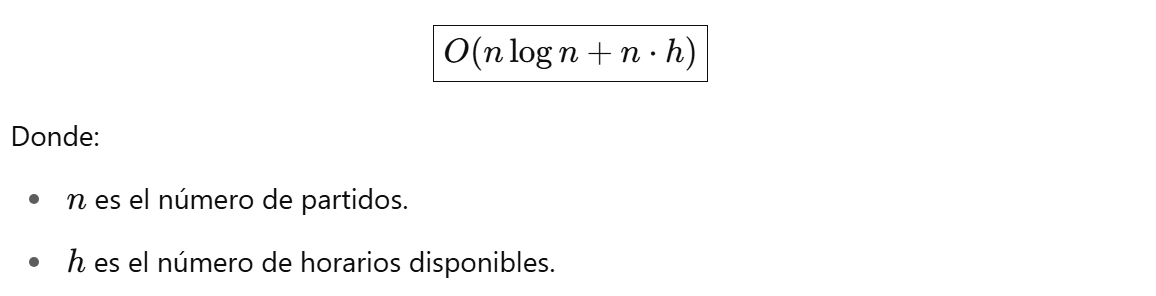

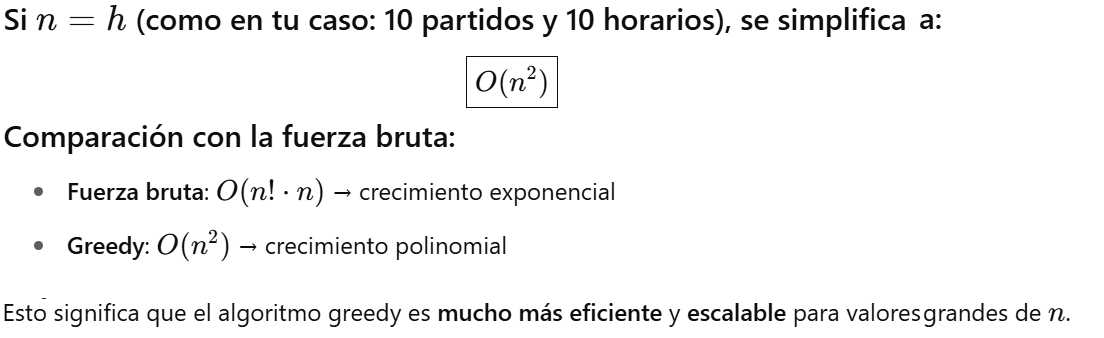

Según el problema (y tenga sentido), diseña un juego de datos de entrada aleatorios

Respuesta

- Juego de datos aleatorios (7 partidos y 7 horarios)

- Parámetros necesarios (audiencia base, ponderaciones, penalizaciones)

- Algoritmo greedy para asignar partidos

- Cálculo e impresión de la audiencia total efectiva

Aplica el algoritmo al juego de datos generado

Respuesta

In [24]:
import pandas as pd

#  1. Lista aleatoria de partidos (7)
partidos = [
    ("César Vallejo", "Deportivo Municipal", "C", "B"),
    ("Sport Boys", "UTC", "B", "B"),
    ("Melgar", "Alianza Lima", "B", "A"),
    ("ADT Tarma", "Comerciantes Unidos", "C", "C"),
    ("Cienciano", "Binacional", "B", "C"),
    ("Cusco FC", "Carlos A. Mannucci", "B", "B"),
    ("Unión Comercio", "Sport Huancayo", "C", "B")
]


#  2. Horarios disponibles (7 horarios)
horarios = ['V20', 'S16', 'S18', 'S20', 'D12', 'D16', 'D18']

#  3. Audiencia base según categoría de equipos
audiencia_base = {
    ('A', 'A'): 2.0,
    ('A', 'B'): 1.3,
    ('A', 'C'): 1.0,
    ('B', 'B'): 0.9,
    ('B', 'C'): 0.75,
    ('C', 'C'): 0.6
}

#  4. Ponderaciones por horario
ponderaciones = {
    'V20': 0.4, 'S16': 0.7, 'S18': 0.8, 'S20': 1.0,
    'D12': 0.45, 'D16': 0.75, 'D18': 0.85
}

#  5. Penalizaciones por coincidencias
penalizaciones = {
    0: 0.0, 1: 0.25, 2: 0.45, 3: 0.60, 4: 0.70,
    5: 0.75, 6: 0.78, 7: 0.80, 8: 0.80
}

#  Inicializar estructuras
partidos_ordenados = sorted(
    partidos,
    key=lambda p: audiencia_base.get(tuple(sorted([p[2], p[3]])), 0),
    reverse=True
)

cuenta_horarios = {h: 0 for h in horarios}
asignaciones = []

#  Asignación greedy
for equipo1, equipo2, cat1, cat2 in partidos_ordenados:
    cat_par = tuple(sorted([cat1, cat2]))
    base = audiencia_base[cat_par]
    mejor_horario = None
    mejor_valor = -1

    for horario in horarios:
        pondera = ponderaciones[horario]
        penal = penalizaciones.get(cuenta_horarios[horario], 0.8)
        valor = base * pondera * (1 - penal)

        if valor > mejor_valor:
            mejor_valor = valor
            mejor_horario = horario

    cuenta_horarios[mejor_horario] += 1
    penal_final = penalizaciones[cuenta_horarios[mejor_horario] - 1]
    audiencia_efectiva = round(base * ponderaciones[mejor_horario] * (1 - penal_final), 2)

    asignaciones.append({
        "Partido": f"{equipo1} - {equipo2}",
        "Categorías": f"{cat1}-{cat2}",
        "Horario": mejor_horario,
        "Audiencia Base": base,
        "Ponderación": ponderaciones[mejor_horario],
        "Penalización": penal_final,
        "Audiencia Efectiva": audiencia_efectiva
    })

# 📋 Mostrar resultados
df_resultado = pd.DataFrame(asignaciones)
print(df_resultado)
print(f"\n Audiencia total estimada: {df_resultado['Audiencia Efectiva'].sum().round(2)} millones de espectadores")


                               Partido Categorías Horario  Audiencia Base  \
0                Melgar - Alianza Lima        B-A     S20            1.30   
1                     Sport Boys - UTC        B-B     D18            0.90   
2        Cusco FC - Carlos A. Mannucci        B-B     S18            0.90   
3  César Vallejo - Deportivo Municipal        C-B     S20            0.75   
4               Cienciano - Binacional        B-C     D16            0.75   
5      Unión Comercio - Sport Huancayo        C-B     S16            0.75   
6      ADT Tarma - Comerciantes Unidos        C-C     D18            0.60   

   Ponderación  Penalización  Audiencia Efectiva  
0         1.00          0.00                1.30  
1         0.85          0.00                0.77  
2         0.80          0.00                0.72  
3         1.00          0.25                0.56  
4         0.75          0.00                0.56  
5         0.70          0.00                0.52  
6         0.85          0.

Enumera las referencias que has utilizado(si ha sido necesario) para llevar a cabo el trabajo

Respuesta


Problema planteado en la asignatura Algoritmos de Optimización de la Universidad Internacional de Valencia (VIU).

Fuente principal del enunciado, restricciones y objetivos del caso práctico.

Describe brevemente las lineas de como crees que es posible avanzar en el estudio del problema. Ten en cuenta incluso posibles variaciones del problema y/o variaciones al alza del tamaño

Respuesta

A medida que fui trabajando en este problema, noté que existen varias formas de seguir profundizando en su estudio. Por ejemplo, si se aumenta el número de partidos o se incluyen más condiciones reales, como evitar que dos equipos grandes jueguen al mismo tiempo, el modelo necesitaría adaptarse. También se podría investigar cómo resolverlo cuando hay cambios de última hora en horarios o equipos. Creo que una buena forma de avanzar sería probar otras técnicas, como usar aproximaciones más flexibles o combinar diferentes métodos para mejorar los resultados sin necesidad de evaluar todas las combinaciones posibles.